## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusion](#conclusion)
- [References](#references)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('./ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].drop_duplicates().count() # Dropping duplicates of user_id, then counting up what's left

290584

d. The proportion of users converted.

In [5]:
df['converted'].sum() / df['user_id'].drop_duplicates().count() # Total conversion count / unique users

0.12126269856564711

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
a = df.query('group == "treatment" and landing_page == "old_page"') # Generate dataframe for half of mismatched treatment/page
b = df.query('group == "control" and landing_page == "new_page"') # Generate dataframe for other half of mismatches
print(f"The total number of times that control/treatment are not lined up with old_page/new_page is: {a.shape[0]+b.shape[0]}")

The total number of times that control/treatment are not lined up with old_page/new_page is: 3893


f. Do any of the rows have missing values?

In [7]:
df.isna().sum().any() # Returns True if ANY NaN values exist in any column, False if none exist in any column

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
drop_indices = a.index.append(b.index) # Merge indexes from a and b dataframes, for a full list of indexes of problem rows
df2 = df.drop(index=drop_indices) # Drop all problem rows
df2.shape[0] == df.shape[0] - a.shape[0] - b.shape[0] # Confirm new dataframe size (new = old - a_problems - b_problems)

True

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df['user_id'].drop_duplicates().count() # Dropping duplicates of user_id, then counting up what's left

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2['user_id'].value_counts().head(1) # Count number of occurrences of each user_id, limited to top result 

773192    2
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
df2.query('user_id == 773192') # Query for all rows with user_id 773192

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop(index=1899, inplace=True) # Removing the first entry, could remove either one

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
base_cr = df2['converted'].mean() # Mean of all conversions (no filter)

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
df2[df2['group'] == "control"].converted.mean() # Filter for control group, mean of conversions

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
df2[df2['group'] == "treatment"].converted.mean() # Filter for treatment group, mean of conversions

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
np_landings = df2[df2['landing_page'] == "new_page"].shape[0] # Number of times new page was received
op_landings = df2[df2['landing_page'] == "old_page"].shape[0] # Number of times old page was received
print(f"An individual visiting the site had a {np_landings / (np_landings + op_landings)} probability of landing on the new page.")

An individual visiting the site had a 0.5000619442226688 probability of landing on the new page.


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

<span style="color: green;">*Based on the data examined thus far, I don't see any evidence that the new treatment page leads to more conversions than the old one. The new treatment page has a slightly lower conversion rate (by about 0.0016) than the old page. The sample sizes being quite balanced indicates that something like Simpson's Paradox is not distorting my view of the data. Absent other compelling data or benefits from the new page, I conclude that the old page should remain in place, having greater or equal conversion results to the new page.*</span>

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<span style="color: green;">
$H_{0}: p_{new} - p_{old} \leq 0$

$H_{1}: p_{new} - p_{old} > 0$

*To make this decision with an $\alpha$ of 0.05, if the p-value is below 0.05, I will reject the null hypothesis. If the p-value is higher than 0.05, I will fail to reject the null hypothesis.*</span>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
base_cr # Use established stored variable

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
base_cr # Use established stored variable

0.11959708724499628

c. What is $n_{new}$?

In [20]:
np_landings # Use established stored variable

145310

d. What is $n_{old}$?

In [21]:
op_landings # Use established stored variable

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
# Simulating 0's (fails) and 1's (converts) with the appropriate probability from above for the new page
new_page_converted = np.random.choice([0, 1], size=np_landings, p=[(1 - base_cr), base_cr])
new_page_converted.mean() # Check conversion rate to verify consistency with intended

0.12045282499483861

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
# Simulating 0's (fails) and 1's (converts) with the appropriate probability from above for the old page
old_page_converted = np.random.choice([0, 1], size=op_landings, p=[(1 - base_cr), base_cr])
old_page_converted.mean() # Check conversion rate to verify consistency with intended

0.11896829439541831

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
# Finding simulated difference between new and old page simulations
sim_diff = new_page_converted.mean() - old_page_converted.mean()
print(sim_diff)

0.0014845305994203029


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
p_diffs = [] # Generate empty list to store diff values
# Simulate 10,000 trials of our model, with 'np_landings' of occurrences and 'base_cr' success rate
temp_new_sim = np.random.binomial(np_landings, base_cr, 10000)/np_landings
# Simulate 10,000 trials of our model, with 'op_landings' of occurrences and 'base_cr' success rate
temp_old_sim = np.random.binomial(op_landings, base_cr, 10000)/op_landings
p_diffs = temp_new_sim - temp_old_sim # Create array of differences from list

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

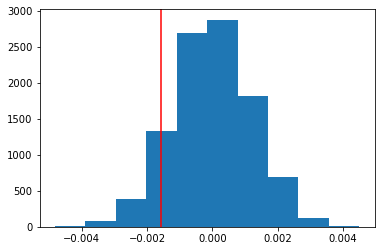

In [26]:
# Calculate observed difference in actual data from earlier
obs_diff = df2[df2['group'] == "treatment"].converted.mean() - df2[df2['group'] == "control"].converted.mean()
plt.hist(p_diffs); # Plot of all diffs from 10,000 simulations looks like a normal distribution
plt.axvline(obs_diff, color='red'); # Plotting the observed difference

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
# Calculate p-value by looking at all simulated differences which exceeded the observed difference, then find proportion of such
p_val = (p_diffs > obs_diff).mean() 
p_val

0.9058

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<span style="color: green;">*This proportion of results greater than the result we observed is a p-value, and it reflects the probability of obtaining results at least as extreme as the one encountered, under the assumption that the null hypothesis is correct. That p-value is then compared against an alpha, commonly 0.05 (but sometimes 0.01 or even less). Alpha is a threshold which indicates whether the test statistic that we've observed is statistically relevant.*</span>

<span style="color: green;">*If the p-value is less than the alpha (more extreme than the threshold established by the alpha), then we conclude that the observed statistic is statistically significant. If the p-value is larger than our alpha, we would conclude that the observed statistic is statistically insignificant and likely a result of variability in our samples.*</span>

<span style="color: green;">*In this case, the p-value of 0.1048 is larger than an alpha of 0.05, indicating that the difference between the new page and the old page is not statistically significant. As a result, we fail to reject the null hypothesis. In this study, that means we continue to use the old page.*</span>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" and converted == 1').shape[0] # Calculate raw number of conversions on old page
convert_new = df2.query('group == "treatment" and converted == 1').shape[0] # Calculate raw number of conversions on new page
n_old = op_landings # Number of landings on old page
n_new = np_landings # Number of landings on new page
print(convert_old, convert_new, n_old, n_new)

17489 17264 145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [29]:
# Placing needed data in ztest, by documentation's convention
count = np.array([convert_new, convert_old]) 
nobs = np.array([n_new, n_old])
z_score, p_val = sm.stats.proportions_ztest(count, nobs, alternative = 'larger')

In [30]:
print(f"The p value is {p_val:.3f}") 
print(f"The z score is {z_score:.3f}")

The p value is 0.905
The z score is -1.311


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

<span style="color: green;">*The p-value provided by `stats.proportions_ztest` is consistent with the p-value calculated previously, being around 0.90. This means that under the null hypothesis, approximately 90% of observations are more extreme than our observed statistic. This continues to indicate that we should fail to reject the null hypothesis and continue using the old page.*</span>

<span style="color: green;">*The z-stat is indicative of how far away the observed difference between the null and alternative hypotheses is, in number of standard deviations from the null. Under a normal distribution, 95% of observed datapoints occur within 2 standard deviations (plus or minus) of the population mean. Our z-score of -1.3 is well within this boundary, meaning that it falls into a 95% confidence interval and we can be confident that this difference is not statistically significant. The z-score of -1.3 specifically tells us that the mean conversion rate for the new page is 1.3 standard deviations *below* the mean conversion rate of the old page.*</span>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

<span style="color: green;">*We'll use logistic regression for this problem, because logistic regression is appropriate when our dependent variable is binary in nature. As there is only conversion or not-conversion, our variable of interest is binary and a suitable candidate for logistic regression.*</span>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
df2['intercept'] = 1 # Establish intercept as 1
group_dummies = pd.get_dummies(df2['group']) # Generate dummy values
group_dummies.rename(columns={'treatment' : 'ab_page'}, inplace=True) # Rename dummy column as directed
group_dummies.drop('control', axis = 1, inplace=True) # Dropping unneeded dummy column
df2 = df2.join(group_dummies) # Join dummy column to df2
df2.head() # Check work - should have one new column 'ab_page'

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [32]:
# Instantiate and fit logistic regression model
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']]) 
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
results.summary2() # Examine model results

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2021-08-26 21:03 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>

<span style="color: green;">*In the logistic regression model, we're testing whether or not the null and alternative hypotheses are different from each other, but not if they're different in a specific direction. Essentially this means that we're doing a two-tailed test (asking: is p(new) the same as p(old)) where what we did before was a one-tailed test (asking: is p(new) greater than or equal to p(old)).  This is why we find a different p-value in this case (~0.19 here, versus ~0.90 previously), because we're asking a different question.*</span>

<span style="color: green;">*Previously, we had an observed difference that was lower than the mean of the null hypothesis. In layman's terms, we then asked "What's the likelihood that this difference is *significantly greater* than the mean?", and our previous p-value said "It's so far away from being in that area, it's pretty hard to see how it could be". This was in large part because our difference was lower than the mean, so it had a long way to go to get to answering our question in the affirmative. In this case, we're asking "What's the likelihood that this difference is *significantly different* than the mean", and our new p-value says "It's not likely, but it's a lot more likely than it was before". This is because the difference is now much closer to a potential answer in the affirmative than it was before, because the two-tailed test creates a new potential answer on the left side of a normal distribution.*</span>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<span style="color: green;">*There are a lot of other factors which could dictate whether or not an individual converts, which we've not accounted for here. Price, for example, is often one of the most powerful factors when it comes to making a sale, which is not addressed in any way in this analysis. This also quickly starts to bleed into other issues such as promotional pricing, bundles, etc. which could also drive conversions. User factors might also be a significant consideration. Some age ranges, genders, backgrounds, etc. may be more or less comfortable with purchasing online, or they may respond differently to different methods of marketing when purchasing online, or they may put different weights on the factors that go into whether a sale is made or not.*</span>

<span style="color: green;">*Analyzing such factors could reveal new insights, but they also come with disadvantages to our analysis. Where we've gotten a relatively clear answer on the question of new page vs old page so far, that clarity dissipates as more and more factors are considered. Logistic regression operates under the assumption that there is linear relationships between the dependend and independent variables, which may not exist with each factor that we might not want to examine. Other factors that we could examine may also be multicollinear with each other, meaning that they are not truly independent and are actually impacting each other as they are also impacting our variable of interest.*</span>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [34]:
df_c = pd.read_csv('./countries.csv') # Load new dataset
df3 = pd.merge(df2, df_c, on="user_id") # Merging cleaned dataset and new data by unique user_id
df3.head() # Check work

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [35]:
df3['country'].value_counts() # Checking values and counts in new data to decide on a baseline

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

<span style="color: green;">*With CA having by far the smallest amount of results in the merged dataframe, I'm going to choose to use CA as the baseline here. This means that the results of the logistic regression will indicate how much users in UK and US differ from users in CA.*</span>

In [36]:
country_dummies = pd.get_dummies(df3['country']) # Generate dummy columns for country values
df3 = df3.join(country_dummies) # Join dummy columns to the main dataframe
df3.head(1) # Check work

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1


In [37]:
base_us_cr = df3.query('US == "1"').converted.mean() # Calculate base conversion rate for US, ignoring old/new page
base_uk_cr = df3.query('UK == "1"').converted.mean() # Calculate base conversion rate for US, ignoring old/new page
base_ca_cr = df3.query('CA == "0"').converted.mean() # Calculate base conversion rate for US, ignoring old/new page
print(f"The base conversion rate for US is {base_us_cr}.")
print(f"The base conversion rate for UK is {base_uk_cr}.")
print(f"The base conversion rate for CA is {base_ca_cr}.")

The base conversion rate for US is nan.
The base conversion rate for UK is nan.
The base conversion rate for CA is nan.


In [38]:
# Instantiate and fit logistic regression model
log_mod = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'US', 'UK']])
results = log_mod.fit()
# Give summary of results
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2021-08-26 21:03 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
==================================================================

"""

<span style="color: green;">*The conversion rates for each of the three countries don't appear to be practically different than what we saw in the aggregate, as they each remain close to a 0.12 conversion rate. CA is a bit lower compared to the UK and US, but its also a much smaller sample size than the other two countries. The statistical summary supports this observation, as the p-values for US and UK (remember, CA is the baseline) are not far enough away (under 0.05) to say that the user's country is statistically significant. The data for the US and UK is relatively similar to each other (if we do this analysis with either country as the baseline, they have much higher p-values with each other than they do CA), but CA's data is definitely further from the US & UK. I cannot say that this difference is statistically significant, but an analysis with much larger sample sizes for each country could very possibly show that conversion in CA is statistically significantly different than other countries (and perhaps between the US and UK as well).*</span>

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [39]:
df3['ab_us'] = df3['US']*df3['ab_page'] # If US user got the new page, = 1, if they got the old page, = 0
df3['ab_uk'] = df3['UK']*df3['ab_page'] # If UK user got the new page, = 1, if they got the old page, = 0
df3['ab_ca'] = df3['CA']*df3['ab_page'] # If CA user got the new page, = 1, if they got the old page, = 0

In [40]:
old_us_cr = df3.query('ab_us == "0"').converted.mean() # Calculate conversion rate for US users on old page
new_us_cr = df3.query('ab_us == "1"').converted.mean() # Calculate conversion rate for US users on new page
# Return results in narrative format
print(f"In US, the conversion rate on the new page is {new_us_cr}. On the old page, its {old_us_cr}.")
print(f"This is a difference of {new_us_cr - old_us_cr:.3f}")

In US, the conversion rate on the new page is nan. On the old page, its nan.
This is a difference of nan


In [41]:
old_uk_cr = df3.query('ab_uk == "0"').converted.mean() # Calculate conversion rate for UK users on old page
new_uk_cr = df3.query('ab_uk == "1"').converted.mean() # Calculate conversion rate for UK users on new page
# Return results in narrative format
print(f"In UK, the conversion rate on the new page is {new_uk_cr}. On the old page, its {old_uk_cr}.")
print(f"This is a difference of {new_uk_cr - old_uk_cr:.3f}")

In UK, the conversion rate on the new page is nan. On the old page, its nan.
This is a difference of nan


In [42]:
old_ca_cr = df3.query('ab_ca == "0"').converted.mean() # Calculate conversion rate for CA users on old page
new_ca_cr = df3.query('ab_ca == "1"').converted.mean() # Calculate conversion rate for CA users on new page
# Return results in narrative format
print(f"In CA, the conversion rate on the new page is {new_ca_cr}. On the old page, its {old_ca_cr}.")
print(f"This is a difference of {new_ca_cr - old_ca_cr:.3f}")

In CA, the conversion rate on the new page is nan. On the old page, its nan.
This is a difference of nan


In [43]:
# Instantiate and fit logistic regression model
log_mod = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'UK', 'US', 'ab_us', 'ab_uk']])
results = log_mod.fit()
# Give summary of results
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2021-08-26 21:03 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
ab_us          0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
ab_uk          0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

<span style="color: green;">*Calculating the difference in conversion rates between old and new pages, per country, revealed differences which did not appear to be practically significant (ranging from +0.002 for UK to -0.008 for CA). Again, US and UK data was more similar to each other, with CA data being further away, but this is still subject to being a relatively small portion of the overall sample. The statistical summary supports this observation, as the p-values for US and UK (CA as the baseline, again) are not far enough away (under 0.05) to indicate a statistically significant impact between the new and old pages on a per-country basis. The higher p-scores found here than in the previous analysis (checking conversion by country, regardless of old or new page) could indicate that the page delivered to a user is less impactful than the country in which they are in. However, neither the country nor the page delivered appeared to be statistically significant to a confidence interval of 95%.*</span>

<a id='conclusions'></a>
## Conclusions
<span style="color: green;">
*Every way in which this data has been examined has failed to show a statistically significant improvement in conversion rate with the new page, relative to the old page. The new page is demonstrated to be, *at best*, statistically indistinguishable from the old in terms of conversion rate, and quite possibly less effective overall. Even accounting for different users' countries to determine if perhaps certain countries were more receptive to the new page design, this continued to be the conclusion. As a result, I must **fail to reject the null hypothesis** and recommend that the old page remain in place, in all countries.*</span>

<a id='references'></a>
## References
<span style="color: green;">
*There were several resources used in completing this project, some for the python scripting but mostly for handling and using `statsmodels`, including interpreting the results. The references used for this project included:

[ZetCode](https://zetcode.com/python/fstring/)
For precision of floats in f-strings

[GeeksForGeeks](https://www.geeksforgeeks.org/advantages-and-disadvantages-of-logistic-regression/)
For discussion of the limitations and advantages of logistic regression

[Udacity Knowledge Forum](https://knowledge.udacity.com/questions/32882)
For using `sm.stats.proportions_ztest` and especially getting my old/new in the right places

[Udacity Knowledge Forum](https://knowledge.udacity.com/questions/621478)
For making sure I was on the right track with my answers and helping to understand the z-score*</span>